# Test for dataset pretreatment
This Jupiter notebook use the 3D OCT in data/duke to export them into data/duke2D as 2D images. 
Note that we can use the function extract_2D with offset to upsample a dataset by collecting various images from the same patient arround the macula. 

In [1]:

from matplotlib import pyplot as plt
import numpy as np
import scipy
from skimage.filters import threshold_otsu,sobel,sobel_v,sobel_h 
from scipy import ndimage
import os
from scipy import io
dirname = os.getcwd()
dirname=os.path.join(dirname,'..')
file_healthy="Farsiu_Ophthalmology_2013_Control_Subject_1001.mat"
file_AMD="Farsiu_Ophthalmology_2013_AMD_Subject_1265.mat"


In [2]:
def read_OCT(path):
	data = io.loadmat(path)   #data is a dictionary 
	return(data)

def extract_2D(data,offset=0):
	h,w,d=data["images"].shape
	image2D=data_healthy["images"][:,:,d//2+offset]
	return(image2D)

## Example of post treatment

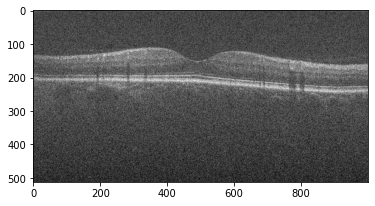

In [3]:
path=os.path.join(dirname, 'data','duke','normal',file_healthy)

data_healthy = read_OCT(path)
image = extract_2D(data_healthy)
plt.imshow(image,cmap="gray")

In [5]:
h,w,d=data_healthy["images"].shape
# image2D=data_healthy["images"][:,:,d//2+offset]
h,w,d

(512, 1000, 100)

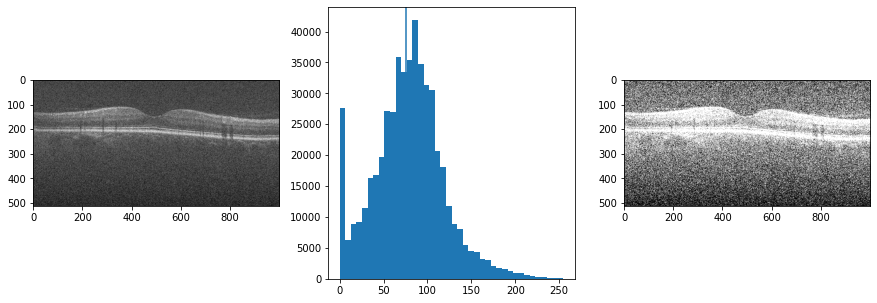

In [13]:
nbins=40
thresholdOtsu=threshold_otsu(image)  

fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(image,cmap="gray")

ax[1].hist(image.flatten(), bins=nbins) #also skimage.exposure.histogram
ax[1].axvline(x=thresholdOtsu)

binary_dapi=image>thresholdOtsu
ax[2].imshow(binary_dapi,cmap="gray")

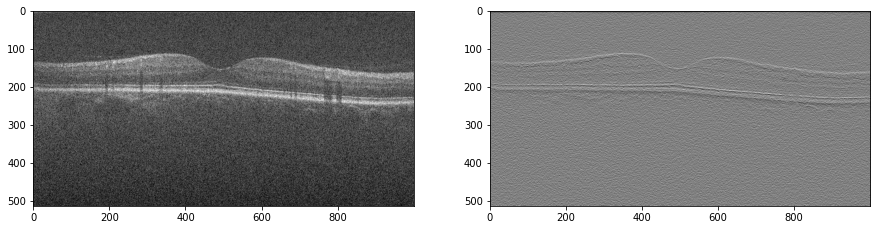

In [14]:
# sobel_mag = np.sqrt(sum([sobel(image, axis=i)**2
#                          for i in range(image.ndim)]) / image.ndim)
sobel_mag=sobel_h(image, mask=None)
sobel_mag=255*(sobel_mag-np.min(sobel_mag))/(np.max(sobel_mag)-np.min(sobel_mag))

fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(image,cmap="gray")
ax[1].imshow(sobel_mag,cmap="gray")

## Creation of the subdataset

In [15]:
from os import listdir
from os.path import isfile, join
from PIL import Image
repository=os.path.join(dirname,"data","duke","normal")
files = [f for f in listdir(repository) if isfile(join(repository, f))]
for f in files:
	path=os.path.join(dirname, 'data','duke','normal',f)
	data_healthy = read_OCT(path)
	image = extract_2D(data_healthy)
	im = Image.fromarray(image)
	l=f.split('_')
	name=l[3]+"_2D_"+l[-1][:-4]
	path_file2D=os.path.join(dirname,"data","duke2D","normal",name+'.png')
	im.save(path_file2D)

In [6]:
from os import listdir
from os.path import isfile, join
from PIL import Image

repository=os.path.join(dirname,"data","duke","amd")
files = [f for f in listdir(repository) if isfile(join(repository, f))]
for f in files:
	path=os.path.join(dirname, 'data','duke','amd',f)
	data_healthy = read_OCT(path)
	image = extract_2D(data_healthy)
	im = Image.fromarray(image)
	l=f.split('_')
	name=l[3]+"_2D_"+l[-1][:-4]
	path_file2D=os.path.join(dirname,"data","duke2D","amd",name+'.png')
	im.save(path_file2D)